In [1]:
#TFI Restaurant Revenue Analysis
#John Lin

In [2]:
#Import pandas
import pandas as pd

#Define csv file
#sample='https://raw.githubusercontent.com/Descolda/tfi/main/sampleSubmission.csv?token=AWXWQYBWT23X46XLM3FDDFLBU7NDK'
test='https://raw.githubusercontent.com/Descolda/tfi/main/test.csv'
train='https://raw.githubusercontent.com/Descolda/tfi/main/train.csv'

#Read csv files as pandas dataset
#Define the test data and train data needed
df_test  = pd.read_csv(test)
df_train = pd.read_csv(train)

In [3]:
#Check if there is missing values
df_test.isna().sum()
df_train.isna().sum()
#No missing values, don't need to dropna

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [4]:
#Exploring Data Visually
#Importing matplot to analyze data
import matplotlib
import matplotlib.pyplot as plt

Text(0, 0.5, 'Revenue')

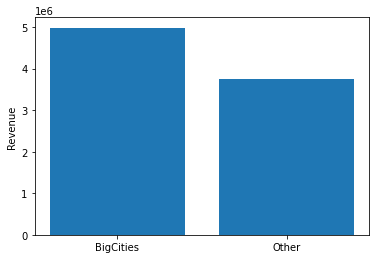

In [5]:
#Analyzing Cities compared to revenue

#CityGroup Analysis

#Grouping Citygroups for Big Cities and Other
ggby = df_train.groupby(['City Group'])
for key, item in ggby:
    ggby.get_group(key), "\n\n"

#Finding mean of Revenue
citygroup_mean=ggby['revenue'].mean()

#Locating mean of big cities and other
BigCities_rev=citygroup_mean.loc[('Big Cities')]
Other_rev=citygroup_mean.loc[('Other')]

#Plotting graph of revenue to city type comparison
fig, ax  = plt.subplots()
ax.bar([1, 2], [BigCities_rev, Other_rev], width=0.8,  
       tick_label=['BigCities', 'Other'], align='center',)
ax.set_ylabel('Revenue')

Text(0, 0.5, 'Revenue')

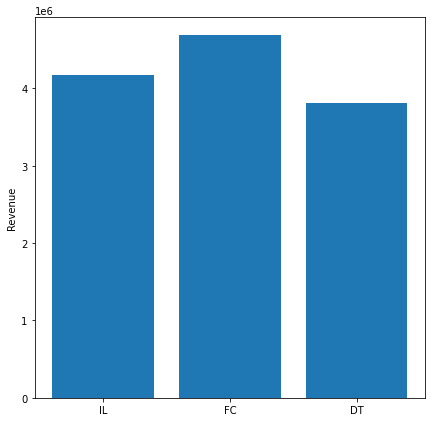

In [6]:
#Analyzing Cities compared to revenue and opening days

#Type Analysis

#Grouping Types
ggby = df_train.groupby(['Type'])
for key, item in ggby:
    ggby.get_group(key), "\n\n"

#Finding mean of Revenue
type_mean=ggby['revenue'].mean()

#Locating mean of types
IL=type_mean.loc[('IL')]
FC=type_mean.loc[('FC')]
DT=type_mean.loc[('DT')]

#Plotting graph of revenue to type comparison
fig, ax  = plt.subplots(figsize=(7,7))
ax.bar([1, 2, 3], [IL, FC, DT],  
       tick_label=['IL', 'FC', 'DT'], align='center',)
ax.set_ylabel('Revenue')

<AxesSubplot:xlabel='City'>

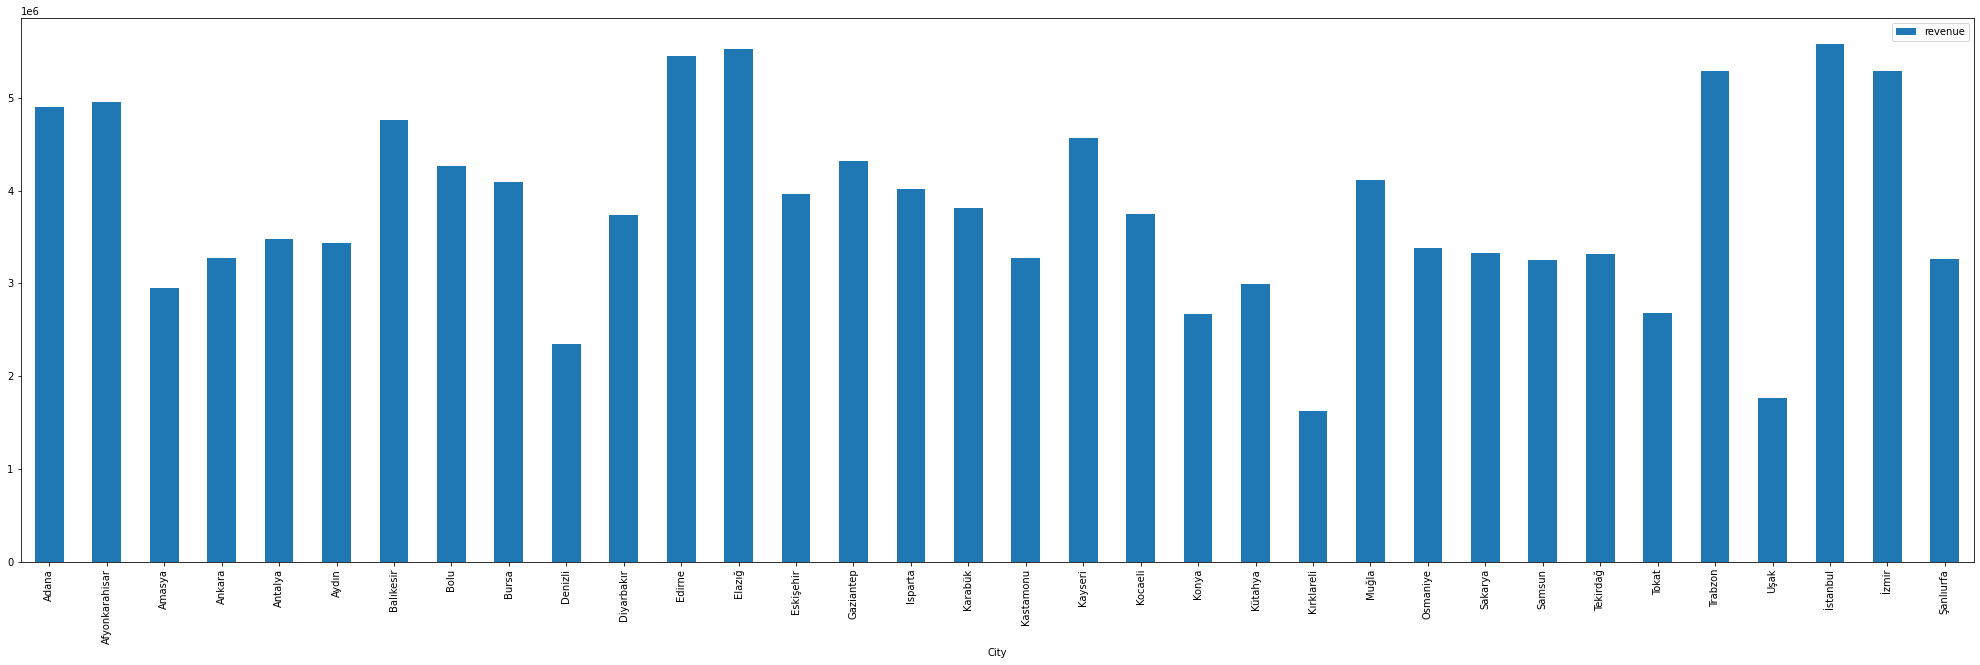

In [7]:
#Create dataframe grouped by City and Revenue
new_df=df_train.groupby('City')[['revenue']].mean()

#Plotting graph of revenue to city comparison
new_df.plot(kind='bar', figsize=(35,10))


In [8]:
#Importing useful modules
import seaborn as sns
import numpy as np

<AxesSubplot:>

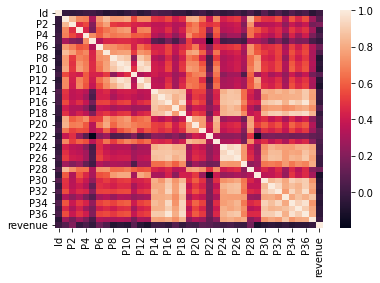

In [9]:
sns.heatmap(df_train.corr(method='pearson', min_periods=1))

Original Skew 2.793478695162504
Log Transformed Skew 0.30740162838726504


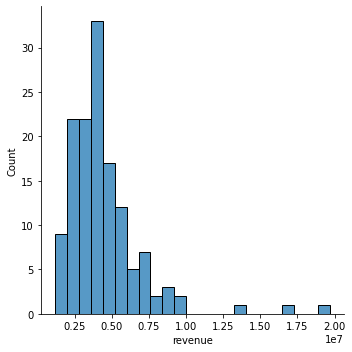

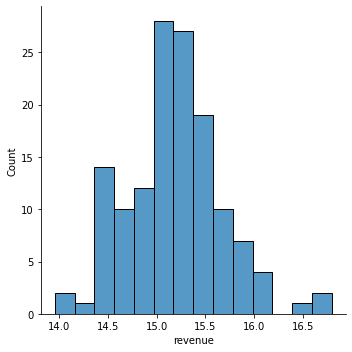

In [10]:
#Finding Skew in data

#Displaying skew in original data
print('Original Skew', df_train['revenue'].skew())
sns.displot(df_train['revenue'])

#Transforming skew in revenue and displaying the transformed data
df_train['revenue']=np.log(df_train['revenue'])
print('Log Transformed Skew', df_train['revenue'].skew())
sns.displot(df_train['revenue'])

In [11]:
#Calculate how long stores are opened for train data
#Assuming end date is Dec 2015

#Change Open Date to datetime format
df_train['Open Date']= pd.to_datetime(df_train['Open Date'])
df_test['Open Date']= pd.to_datetime(df_test['Open Date'])

#Create a dataframe to signfy the current date to subtract from
current_date = pd.DataFrame({'CurrentDate': ['2015-12-1']})
current_date['CurrentDate']= pd.to_datetime(current_date['CurrentDate'])

#Create a new column showing how long the stores were opened for
df_train['Opened For']= (current_date['CurrentDate'][0]-df_train['Open Date']).dt.days
df_test['Opened For']= (current_date['CurrentDate'][0]-df_test['Open Date']).dt.days

#Deleting unneccessary Open Date column
#Dropping cities too because test differs from train
df_train=df_train.drop(columns=['Open Date','City'])
df_test=df_test.drop(columns=['Open Date', 'City'])


In [12]:
#One hot encoding

#Defining columns that need one hot encoding
cols=['City Group','Type']

#Using one hot encoding on objects
train=pd.get_dummies(df_train, columns=cols, drop_first=True)
test=pd.get_dummies(df_test, columns=cols, drop_first=True)

In [13]:
#Train test split, preperations for random forest
from sklearn.model_selection import train_test_split

#Using train test split on training data
X_train=train.drop(columns=['revenue'])
y_train=train['revenue']
X_train, X_test, y_train, y_test =train_test_split(X_train, y_train)

In [14]:

#Importing random forest and gridsearch to find best paramaters
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Params that will be tested with grid search
param_grid = {
    'max_depth': [10, 30, 70, 100],
    'max_features': [.3, .4, .5],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [50, 100, 200]
}

#Defining rf for grid search
rf=RandomForestRegressor()

#Searching grid defined earlier to find best paramaters
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv = 10, n_jobs = -1, verbose = 2)
    
grid_search.fit(X_train, y_train)

grid_search.best_params_ 


Fitting 10 folds for each of 324 candidates, totalling 3240 fits


{'max_depth': 70,
 'max_features': 0.4,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 50}

(array([  171.,  2757.,  2652.,  2338.,  5512., 15993., 19306., 20507.,
        28630.,  2134.]),
 array([14.38557689, 14.40851165, 14.43144641, 14.45438117, 14.47731593,
        14.50025069, 14.52318545, 14.54612021, 14.56905497, 14.59198972,
        14.61492448]),
 <BarContainer object of 10 artists>)

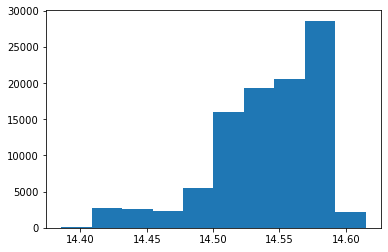

In [15]:
#Random Forest Regressor Solution

#Importing important functions
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot

#Using paramaters measured earlier in grid search
rf=RandomForestRegressor(n_estimators=50, max_depth=10, min_samples_leaf=3,
                          min_samples_split=8, random_state=42)

#Fit the model to the paramaters defined
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_pred=rf.predict(X_test)

#Finding mse to be used in submission
rtrain_mse = mean_squared_error(y_train_pred, y_train)
rtest_mse = mean_squared_error(y_test, y_pred)

#Graphing Results
rf_pred = rf.predict(test.drop('Id', axis=1))
plt.hist(rf_pred)

In [16]:
#Checking accuracy
from sklearn import metrics

#Low values good fit
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4154676842914979
Mean Squared Error: 0.24965720823342394
Root Mean Squared Error: 0.4996570906465993


Feature: 0, Score: 0.11716
Feature: 1, Score: 0.02104
Feature: 2, Score: 0.02387
Feature: 3, Score: 0.00690
Feature: 4, Score: 0.01076
Feature: 5, Score: 0.02189
Feature: 6, Score: 0.00924
Feature: 7, Score: 0.00628
Feature: 8, Score: 0.01261
Feature: 9, Score: 0.00420
Feature: 10, Score: 0.02416
Feature: 11, Score: 0.02200
Feature: 12, Score: 0.01260
Feature: 13, Score: 0.01182
Feature: 14, Score: 0.01113
Feature: 15, Score: 0.00709
Feature: 16, Score: 0.00000
Feature: 17, Score: 0.01282
Feature: 18, Score: 0.00118
Feature: 19, Score: 0.01694
Feature: 20, Score: 0.03262
Feature: 21, Score: 0.00730
Feature: 22, Score: 0.02692
Feature: 23, Score: 0.01677
Feature: 24, Score: 0.00166
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00203
Feature: 27, Score: 0.00595
Feature: 28, Score: 0.04624
Feature: 29, Score: 0.00812
Feature: 30, Score: 0.00771
Feature: 31, Score: 0.00895
Feature: 32, Score: 0.00383
Feature: 33, Score: 0.00154
Feature: 34, Score: 0.00198
Feature: 35, Score: 0.00756
Fe

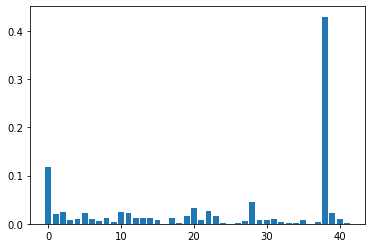

In [17]:
#Importance in random forest regressor

#Defining importance
importance=rf.feature_importances_

#Showing which features are important
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

#Graphing feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

(array([     0.,      0.,      0.,      0.,      0., 100000.,      0.,
             0.,      0.,      0.]),
 array([13.94814163, 14.04814163, 14.14814163, 14.24814163, 14.34814163,
        14.44814163, 14.54814163, 14.64814163, 14.74814163, 14.84814163,
        14.94814163]),
 <BarContainer object of 10 artists>)

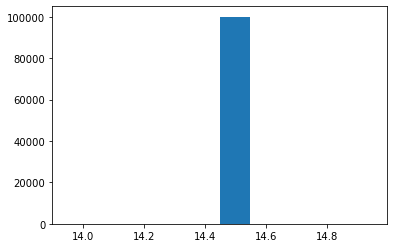

In [18]:
#Knn solution
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

#Graphing Results
knn_pred = knn.predict(test.drop('Id', axis=1))
plt.hist(knn_pred)


C:\Users\johnl\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:50:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


(array([     0.,      0.,      0.,      0.,      0., 100000.,      0.,
             0.,      0.,      0.]),
 array([13.45515945, 13.55515945, 13.65515945, 13.75515945, 13.85515945,
        13.95515945, 14.05515945, 14.15515945, 14.25515945, 14.35515945,
        14.45515945]),
 <BarContainer object of 10 artists>)

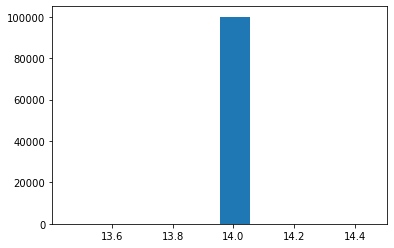

In [19]:
#XGBoost Solution
from xgboost import XGBClassifier

xgb=XGBClassifier()
xgb.fit(X_train, y_train)

#Graphing Results
xgb_pred = xgb.predict(test.drop('Id', axis=1))
plt.hist(xgb_pred)